Given a CSV data file as represented by the sample file GermanCredit.csv (1000 records), load it into a Pandas DataFrame, and perform the following tasks on it. 

In [273]:
import numpy as np
import pandas as pd
from pandas import Series
from pandas import DataFrame
import matplotlib
from matplotlib import pyplot as plt

credit_f = open('GermanCredit.csv')
cred = pd.read_csv(credit_f)

## Preprocessing (31 pts)

1. [8 pts] Drop the 3 columns that contribute the least to the dataset. These would be the columns with the highest number of non-zero 'none' values. Break ties by going left to right in columns. (Your code should be generalizable to drop n columns, but for the rest of the analysis, you can call your code for n=3.) 

In [274]:
def drop_none_cols(df, n=3):
    none_dict = {}
    tiebreaker = 0.999
    for col in df:
        none_count = (cred[col] == 'none').sum()
        none_count += tiebreaker
        none_dict[col] = none_count
        tiebreaker -= 0.001
    sorted_dict = {key: value for key, value in sorted(none_dict.items(), key=lambda item: item[1], reverse=True)}
    for key in sorted_dict:
        df.drop(key, axis=1, inplace=True)
        n -= 1
        if n <= 0: break
        
drop_none_cols(cred)  

2. [4 pts] Certain values in some of the columns contain unnecessary apostrophes (‘). Remove the apostrophes. 

In [275]:
def remove_apo(x):
    if type(x) != str: return x
    x = x.split("'")
    return x[1] if len(x) > 1 else x[0]

cred = cred.applymap(remove_apo)

3. [5 pts] The checking_status column has values in 4 categories: 'no checking', '<0', '0<=X<200', and '>=200'. Change these to 'No Checking', 'Low', 'Medium', and 'High' respectively. 

In [276]:
cred['checking_status'].replace(['no checking', '<0', '0<=X<200', '>=200'], ['No Checking', 'Low', 'Medium', 'High'], inplace=True)

4. [5 pts] The savings_status column has values in 4 categories: 'no known savings', '<100', '100<=X<500', '500<=X<1000', and '>=1000'. Change these to 'No Savings', 'Low', 'Medium', 'High', and 'High' respectively.

In [277]:
cred['savings_status'].replace(['no known savings', '<100', '100<=X<500', '500<=X<1000', '>=1000'],['No Savings', 'Low', 'Medium', 'High', 'High'], inplace=True)

5. [4 pts] Change class column values from 'good' to '1' and 'bad' to '0'.

In [278]:
cred['class'].replace(['good', 'bad'],['1', '0'], inplace=True)

6. [5 pts] Change the employment column value 'unemployed' to 'Unemployed', and for the others, change to 'Amateur', 'Professional', 'Experienced' and 'Expert', depending on year range. 

In [279]:
cred['employment'].replace(['unemployed', '<1', '1<=X<4', '4<=X<7', '>=7'],['Unemployed', 'Amateur', 'Professional', 'Experienced', 'Expert'], inplace=True)

## Analysis (17 points)

1. [5 pts] Often we need to find correlations between categorical attributes, i.e. attributes that have values that fall in one of several categories, such as "yes"/"no" for attr1, or "low","medium","high" for attr2.  
    &emsp; a. [3 pts] Get the count of each category of foreign workers (yes and no) for each class of credit (good and bad).  
    &emsp; b. [2 pts] Similarly, get the count of each category of employment for each category of saving_status. 

In [291]:
print('Count of each category of foreign workers for each category of credit:')
print(pd.crosstab(cred['foreign_worker'], cred['class']))

print('\nCount of each category of employment for each category of savings status:')
print(pd.crosstab(cred['employment'], cred['savings_status']))

Count of each category of foreign workers for each category of credit:
class             0    1
foreign_worker          
no                4   33
yes             296  667

Count of each category of employment for each category of savings status:
savings_status  High  Low  Medium  No Savings
employment                                   
Amateur           12  120      17          23
Experienced       18  100      24          32
Expert            34  133      22          64
Professional      44  210      33          52
Unemployed         3   40       7          12


2. [4 pts] Find the average credit_amount of single males that have 4<=X<7 years of employment. You can leave the raw result as is, no need for rounding.

In [281]:
average_credit = cred[(cred['employment'] == 'Experienced') & (cred['personal_status'] == 'male single')]['credit_amount'].mean()
print(f'Average credit amount for single males with 4<=X<7 years of employment: {average_credit}')

Average credit amount for single males with 4<=X<7 years of employment: 4142.592592592592


3. [4 pts] Find the average credit duration for each of the job types. You can leave the raw result as is, no need for rounding.

In [282]:
for job_type in cred['job'].unique():
    job_average = cred[cred['job'] == job_type]['duration'].mean()
    print(f'Average credit duration for job type "{job_type}": {job_average}')

Average credit duration for job type "skilled": 21.41111111111111
Average credit duration for job type "unskilled resident": 16.535
Average credit duration for job type "high qualif/self emp/mgmt": 25.16891891891892
Average credit duration for job type "unemp/unskilled non res": 17.363636363636363


4. [4 pts] For the purpose 'education', what is the most common checking_status and savings_status? Your code should print:

        Most common checking status: ...
        Most common savings status: ...

In [283]:
edu_subset = cred[cred['purpose'] == 'education']
check_mode = edu_subset['checking_status'].mode()[0]
save_mode = edu_subset['savings_status'].mode()[0]
print(f'Most common checking status: {check_mode}')
print(f'Most common savings status: {save_mode}')

Most common checking status: No Checking
Most common savings status: Low


## Visualization (24 pts)

1. [9 pts] Plot subplots of two bar charts: one for savings_status (x-axis) to personal status (y-axis), and another for checking_status (x-axis) to personal_status (y-axis). In each of the charts, each personal status category bar (number of people in that category) should be of a different color.

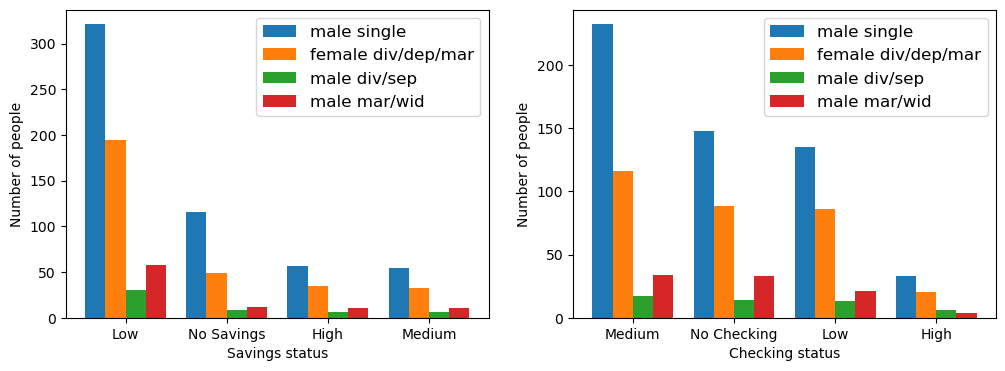

In [287]:
fig, axes = plt.subplots(1,2,figsize=(12,4))  # 1 row, 2 columns
offset = -0.3
for personal in cred['personal_status'].unique():
    count = cred[cred['personal_status'] == personal]['savings_status'].value_counts()
    axes[0].bar(np.arange(len(count)) + offset, count, 0.2, label = personal)
    offset += 0.2
axes[0].set_xticks(np.arange(len(count)), count.index)
axes[0].legend(prop={'size': 12})
axes[0].set_xlabel('Savings status')
axes[0].set_ylabel('Number of people')

offset = -0.3
for personal in cred['personal_status'].unique():
    count = cred[cred['personal_status'] == personal]['checking_status'].value_counts()
    axes[1].bar(np.arange(len(count)) + offset, count, 0.2, label = personal)
    offset += 0.2
axes[1].set_xticks(np.arange(len(count)), count.index)
axes[1].legend(prop={'size': 12})
axes[1].set_xlabel('Checking status')
axes[1].set_ylabel('Number of people')

plt.show()

2. [9 pts] For people having credit_amount more than 4000, plot a bar graph which maps property_magnitude (x-axis) to the average customer age for that magnitude (y-axis).

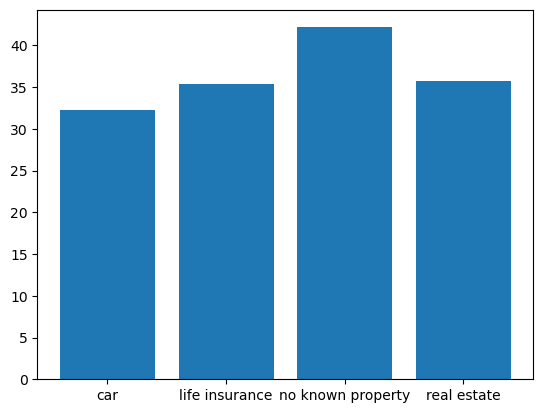

In [288]:
credit40 = cred[cred['credit_amount'] > 4000]
average_ages = credit40.groupby('property_magnitude')['age'].mean()
plt.bar(average_ages.index, average_ages) 
plt.show()

3. [6 pts] For people with a "High" savings_status and age above 40, use subplots to plot the following pie charts:  
    &emsp; a. Personal status  
    &emsp; b. Credit history  
    &emsp; c. Job 


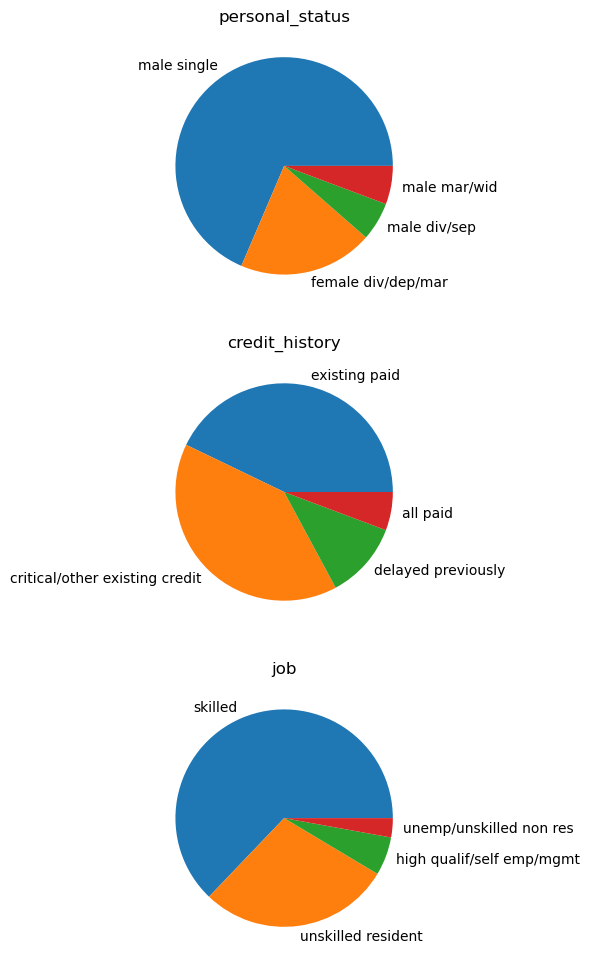

In [289]:
fig, axes = plt.subplots(3,1, figsize = (4, 12))
high40 = cred[(cred['savings_status'] == 'High') & (cred['age'] > 40)]

pie_cat = ['personal_status', 'credit_history', 'job']
#making pie chart for each category in pie_cat:
for index in range(0,3):
    count = high40[pie_cat[index]].value_counts()
    axes[index].pie(count, labels = count.index)
    axes[index].set_title(pie_cat[index])
plt.show()